# **Customer Churn Prediction**

Customer churn prediction is a crucial task for businesses to identify customers who are likely to stop using a service. By analyzing historical data, companies can take proactive measures to retain valuable customers. 

This project uses machine learning models, including **Logistic Regression** and **CatBoost**, to predict customer churn based on various features such as customer demographics, service usage patterns, and account information. Additionally, we will analyze the importance of different features to understand which factors contribute most to customer churn.


# **Key Steps in Customer Churn Prediction**

1. **Importing Libraries**  
   Load the necessary Python libraries for data processing, visualization, and machine learning.

2. **Loading the Dataset**  
   Read the customer churn dataset and explore its structure.

3. **Data Preprocessing**  
   - Handle missing values  
   - Encode categorical variables  
   - Scale numerical features  
   - Split the dataset into training and testing sets  

4. **Exploratory Data Analysis (EDA)**  
   - Visualize key distributions and correlations  
   - Identify patterns in churned vs. non-churned customers  

5. **Model Training**  
   - Train **Logistic Regression** and **CatBoost** models  
   - Tune hyperparameters for optimal performance  

6. **Model Evaluation**  
   - Evaluate models using accuracy, precision, recall, F1-score, and AUC-ROC  
   - Compare performance between models  

7. **Feature Importance Analysis**  
   - Extract and visualize the most influential features from **Logistic Regression** and **CatBoost**  

8. **Making Predictions**  
   - Use the trained models to predict customer churn on new data  

9. **Conclusion & Business Insights**  
   - Summarize findings and provide actionable insights to reduce churn  

---

This structured approach ensures a comprehensive analysis, helping businesses retain customers effectively.


In [ ]:
%pip install catboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.metrics import average_precision_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score


Note: you may need to restart the kernel to use updated packages.


# **Importing the Dataset**

We will now load the **Telco Customer Churn** dataset. This dataset contains information about customers, their demographics, services, and whether they have churned or not.



In [8]:
df = pd.read_csv(r"C:\Users\Rahul\Desktop\DSA\Data_Science\Customer_Churn_Prediction\data\data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
# Check for Missing Values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

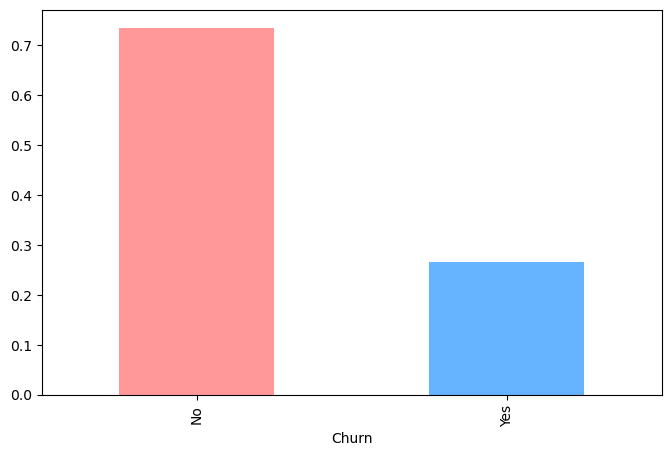

In [12]:
# Target Variable Distribution
df['Churn'].value_counts(normalize=True).plot(kind='bar', figsize=(8, 5), color=['#FF9999', '#66B3FF'])
df['Churn'].value_counts(normalize=True) * 100

In [13]:
# Data Preprocessing
# Drop unnecessary columns
df.drop(columns=['customerID'], inplace=True)


data = df.copy()


# **Feature Engineering & Exploratory Data Analysis (EDA)**

Before training our model, we need to explore the dataset and prepare the features:

### **Exploratory Data Analysis (EDA)**
- Check for missing values and handle them appropriately.
- Analyze the distribution of numerical and categorical variables.
- Visualize relationships between features and the target variable (churn).
- Identify correlations between different variables.

### **Feature Engineering**
- Convert categorical variables into numerical form using encoding techniques.
- Handle missing values using imputation methods if required.
- Scale numerical features for better model performance.
- Create new features if necessary to improve model predictive power.

The next step will involve applying these transformations and analyzing the data to gain insights. 🚀


In [14]:
# Convert categorical variables to numerical using Label Encoding
LabelEncoder = LabelEncoder()
categories = df.select_dtypes(include=[object]).columns
for category in categories:
    df[category] = LabelEncoder.fit_transform(df[category])

In [15]:
df.head()
# Gender : {Male:1,Female:0}
# SeniorCitizen : {Yes:1,No:0}
# Partner : {Yes:1,No:0}
# Dependents : {Yes:1,No:0}
# PhoneService : {Yes:1,No:0}
# MultipleLines : {Yes:1,No:0,No phone service:2}
# InternetService : {DSL:0,Fiber optic:1,No:2}
# OnlineSecurity : {Yes:2,No:0,No internet service:1}
# OnlineBackup : {Yes:2,No:0,No internet service:1}
# DeviceProtection : {Yes:2,No:0,No internet service:1}
# TechSupport : {Yes:2,No:0,No internet service:1}
# StreamingTV : {Yes:2,No:0,No internet service:1}
# StreamingMovies : {Yes:2,No:0,No internet service:1}
# Contract : {Month-to-month:0,One year:1,Two year:2}
# PaperlessBilling : {Yes:1,No:0}
# PaymentMethod : {Electronic check:2,Mailed check:3,Bank transfer (automatic):0,Credit card (automatic):1}
# Churn : {Yes:1,No:0}

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [16]:
# Feature Engineering
# Creating new features based on existing ones

# Calculate AvgMonthly Charges
df['AvgMonthlyCharges'] = df['TotalCharges'] / df['tenure']
df['AvgMonthlyCharges'] = df['AvgMonthlyCharges'].fillna(0)

# Calculate TotalCharges per month
df['ChargesPerTenure'] = df['TotalCharges'] / df['tenure']
df['ChargesPerTenure'].fillna(df['MonthlyCharges'], inplace=True)

# Calculate monthly charges to average charges ratio
df['MonthlyToAvgRatio'] = df['MonthlyCharges'] / df['AvgMonthlyCharges']
df['MonthlyToAvgRatio'].fillna(1.0, inplace=True)


In [17]:
service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                      'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df['TotalServices'] = (data[service_columns] == 'Yes').sum(axis=1)


# Segmentation features
df['IsNewCustomer'] = (df['tenure'] <= 6).astype(int)
df['IsLongTermCustomer'] = (df['tenure'] > 24).astype(int)
    
# High-value customer flag
df['IsHighValue'] = (df['MonthlyCharges'] > df['MonthlyCharges'].quantile(0.75)).astype(int)

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCharges,ChargesPerTenure,MonthlyToAvgRatio,TotalServices,IsNewCustomer,IsLongTermCustomer,IsHighValue
0,0,0,1,0,1,0,1,0,0,2,...,29.85,2505,0,2505.000000,2505.000000,0.011916,1,1,0,0
1,1,0,0,0,34,1,0,0,2,0,...,56.95,1466,0,43.117647,43.117647,1.320805,3,0,1,0
2,1,0,0,0,2,1,0,0,2,2,...,53.85,157,1,78.500000,78.500000,0.685987,3,1,0,0
3,1,0,0,0,45,0,1,0,2,0,...,42.30,1400,0,31.111111,31.111111,1.359643,3,0,1,0
4,0,0,0,0,2,1,0,1,0,0,...,70.70,925,1,462.500000,462.500000,0.152865,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,84.80,1597,0,66.541667,66.541667,1.274389,7,0,0,0
7039,0,0,1,1,72,1,2,1,0,2,...,103.20,5698,0,79.138889,79.138889,1.304037,6,0,1,1
7040,0,0,1,1,11,0,1,0,2,0,...,29.60,2994,0,272.181818,272.181818,0.108751,1,0,0,0
7041,1,1,1,0,4,1,2,1,0,0,...,74.40,2660,1,665.000000,665.000000,0.111880,2,1,0,0


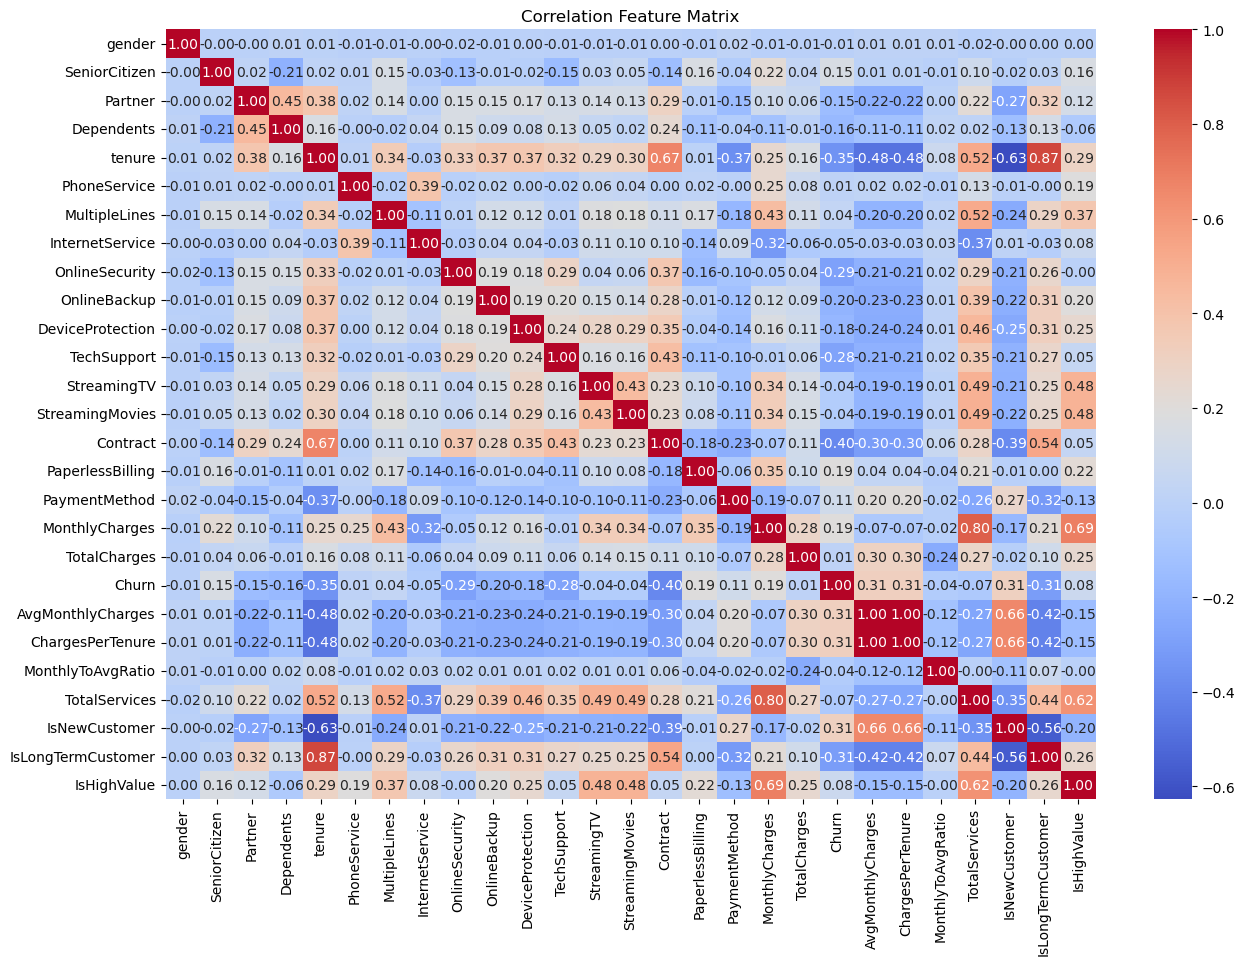

<Figure size 640x480 with 0 Axes>

In [18]:
# Performing EDA

# Correlation Matrix
plt.figure(figsize=(15, 10))
plt.title('Correlation Feature Matrix')
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()
plt.savefig('correlation_matrix.png')

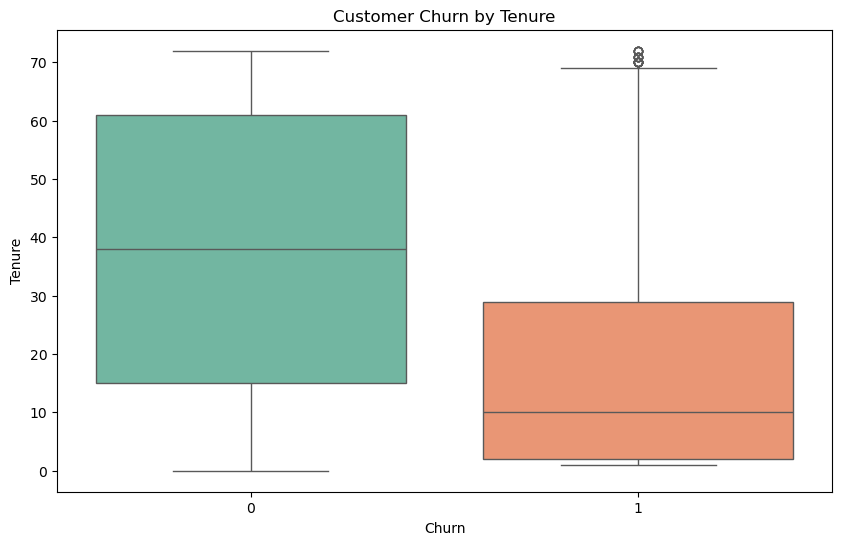

<Figure size 640x480 with 0 Axes>

In [19]:
# Customer Churn by Tenure
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')
plt.title('Customer Churn by Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()
plt.savefig('customer_churn_by_tenure.png')

<Figure size 1000x600 with 0 Axes>

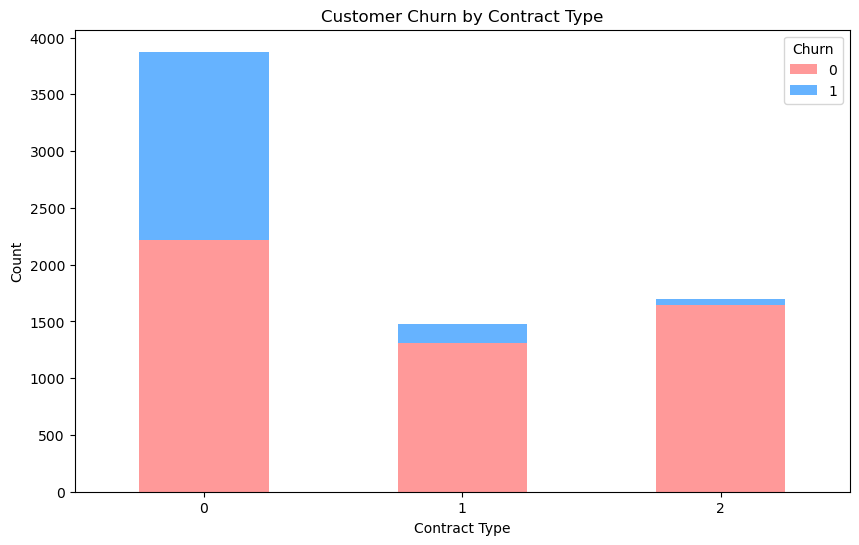

<Figure size 640x480 with 0 Axes>

In [20]:
# Customer Churn by Contract Type
plt.figure(figsize=(10,6))
contract_churn = pd.crosstab(df['Contract'], df['Churn'])
contract_churn.plot(kind='bar', stacked=True, color=['#FF9999', '#66B3FF'], figsize=(10,6))
plt.title('Customer Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
plt.savefig('customer_churn_by_contract_type.png')

<Figure size 1000x600 with 0 Axes>

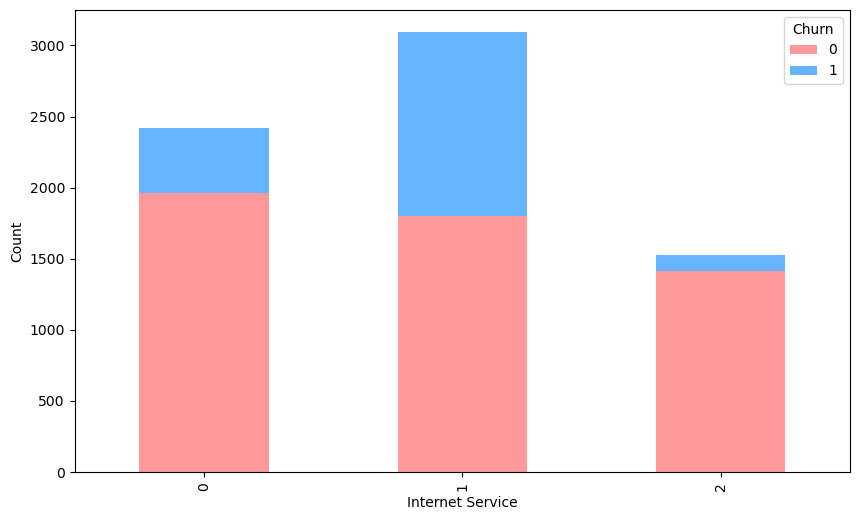

<Figure size 640x480 with 0 Axes>

In [21]:
# Customer Churn by Internet Service
plt.figure(figsize=(10,6))
internet_churn = pd.crosstab(df['InternetService'], df['Churn'])
internet_churn.plot(kind='bar', stacked=True, color=['#FF9999', '#66B3FF'], figsize=(10,6))
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()
plt.savefig('customer_churn_by_internet_service.png')

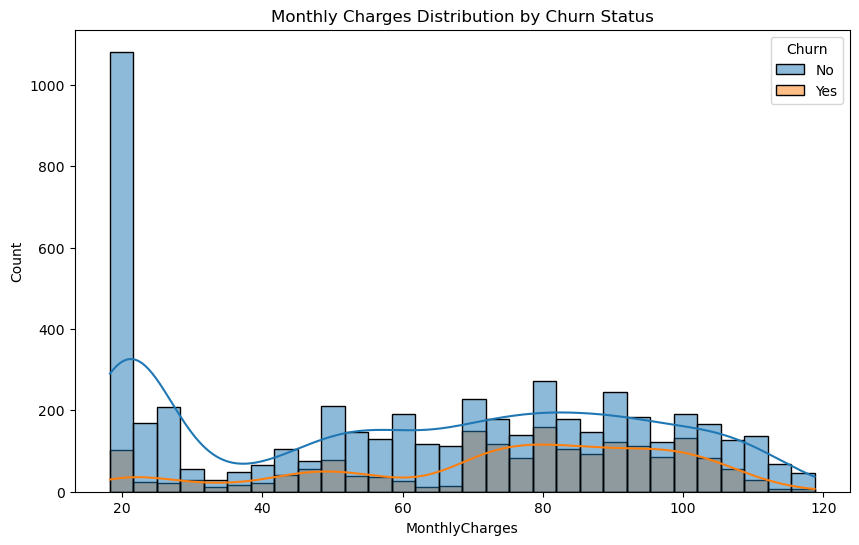

In [22]:
# Monthly charges distribution by churn
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', kde=True, bins=30)
plt.title('Monthly Charges Distribution by Churn Status')
plt.savefig('monthly_charges_by_churn.png')

# **Splitting the Dataset into Training and Testing Sets**

To evaluate our machine learning model effectively, we need to split the dataset into **training** and **testing** sets.

### **Why Split the Data?**
- The **training set** is used to train the model, allowing it to learn patterns from the data.
- The **testing set** is used to evaluate the model’s performance on unseen data, ensuring that it generalizes well.

### **Splitting Strategy**
- We typically use an **80-20 or 70-30 split**, meaning 80% (or 70%) of the data is used for training and the remaining 20% (or 30%) for testing.



In [23]:
# Model Training and Evaluation
# Splitting the data into features and target variable

x = df.drop(columns=['Churn'])
y = df['Churn']

# Splitting the data into training and testing sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)



(5634, 26) (1409, 26) (5634,) (1409,)


In [24]:
# Handling Class Imbalance
from imblearn.over_sampling import SMOTE

# Handle infinite values in x_train
x_train.replace([np.inf, -np.inf], np.nan, inplace=True)
x_train.fillna(0, inplace=True)

# Handling Class Imbalance
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


# **Model Training and Evaluation**

Now that we have preprocessed the data and split it into training and testing sets, we will train machine learning models to predict customer churn.

### **Models Used**
We will train and evaluate the following models:
1. **Logistic Regression** - A simple yet effective baseline model.
2. **CatBoost** - A powerful gradient boosting algorithm optimized for categorical data.
3. **XGBoost** - A powerful gradient boosting algorithm stronger than Random Forest.
4. **Random Forest** - A powerful Decision Tree algorithm better than logistic regression.

### **Evaluation Metrics**
To measure the model’s performance, we will use:
- **Accuracy**: Overall correctness of the model.
- **Precision & Recall**: Important for imbalanced datasets.
- **F1-Score**: Harmonic mean of precision and recall.
- **ROC-AUC Score**: Measures the model’s ability to distinguish between classes.

### **Training Process**
- We will **fit** the models using the training data.
- Evaluate them using the test set.
- Compare performance using various metrics.
- Perform feature importance analysis to understand key drivers of churn.

Let's proceed with training our models! 🚀


In [25]:
# Model Training and Evaluation
# Initialize classifiers
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
catboost = CatBoostClassifier(random_state=42, verbose=0)

    

In [26]:
# Train Models
log_reg.fit(x_train_resampled, y_train_resampled)
random_forest.fit(x_train_resampled, y_train_resampled)
xgb.fit(x_train_resampled, y_train_resampled)
catboost.fit(x_train_resampled, y_train_resampled)

In [27]:
# Handle infinite values in x_test
x_test.replace([np.inf, -np.inf], np.nan, inplace=True)
x_test.fillna(0, inplace=True)

# Make predictions
log_reg_pred = log_reg.predict(x_test)
random_forest_pred = random_forest.predict(x_test)
xgb_pred = xgb.predict(x_test)
catboost_pred = catboost.predict(x_test)


In [28]:
# Evaluating Models

print("Logistic Regression:",accuracy_score(y_test, log_reg_pred))
print("Random Forest:",accuracy_score(y_test, random_forest_pred))
print("XGBoost:",accuracy_score(y_test, xgb_pred))
print("CatBoost:",accuracy_score(y_test, catboost_pred))



Logistic Regression: 0.7622427253371186
Random Forest: 0.7806955287437899
XGBoost: 0.7842441447835344
CatBoost: 0.7963094393186657


In [29]:
# Classification Report
print("Logistic Regression:\n", classification_report(y_test, log_reg_pred))
print("Random Forest:\n", classification_report(y_test, random_forest_pred))
print("XGBoost:\n", classification_report(y_test, xgb_pred))
print("CatBoost:\n", classification_report(y_test, catboost_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1036
           1       0.54      0.75      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409

Random Forest:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.60      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

XGBoost:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1036
           1       0.59      0.60      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79   

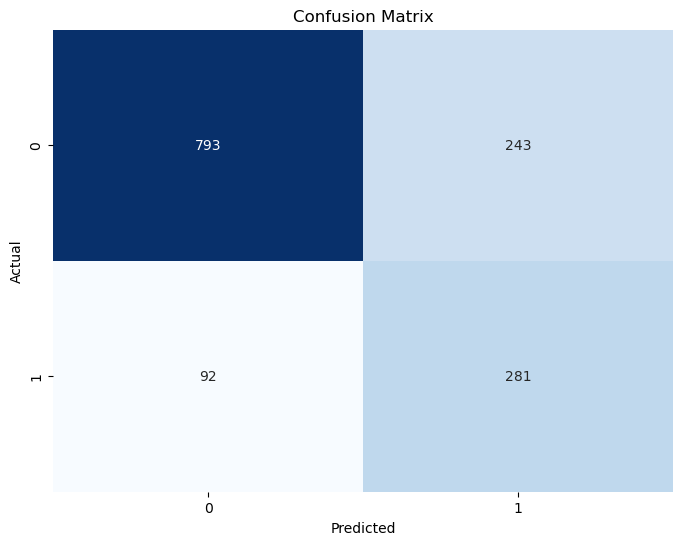

<Figure size 640x480 with 0 Axes>

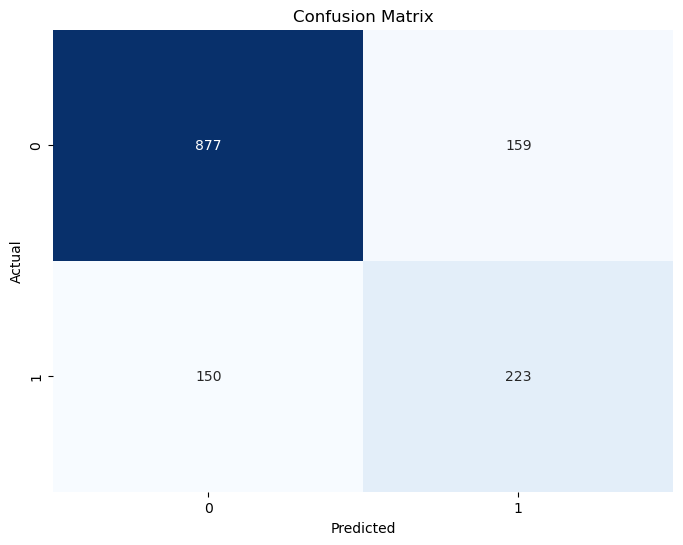

<Figure size 640x480 with 0 Axes>

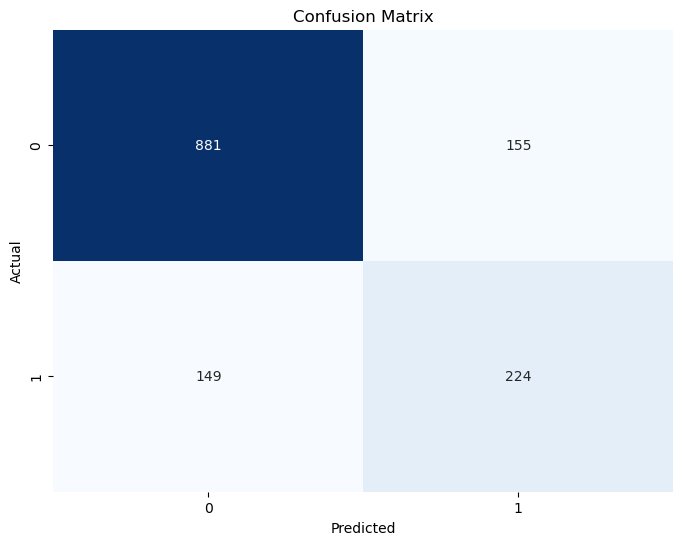

<Figure size 640x480 with 0 Axes>

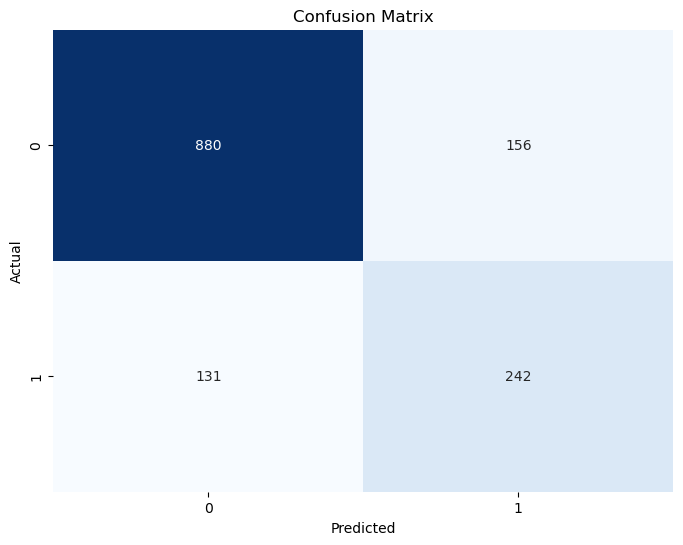

<Figure size 640x480 with 0 Axes>

In [30]:
# Confusion Matrix

def confusion_matrix_log(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    plt.savefig('confusion_matrix.png')

confusion_matrix_log(y_test, log_reg_pred)
confusion_matrix_log(y_test, random_forest_pred)
confusion_matrix_log(y_test, xgb_pred)
confusion_matrix_log(y_test, catboost_pred)

Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.7743080198722498
Best Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.79      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.81      0.77      0.78      1409



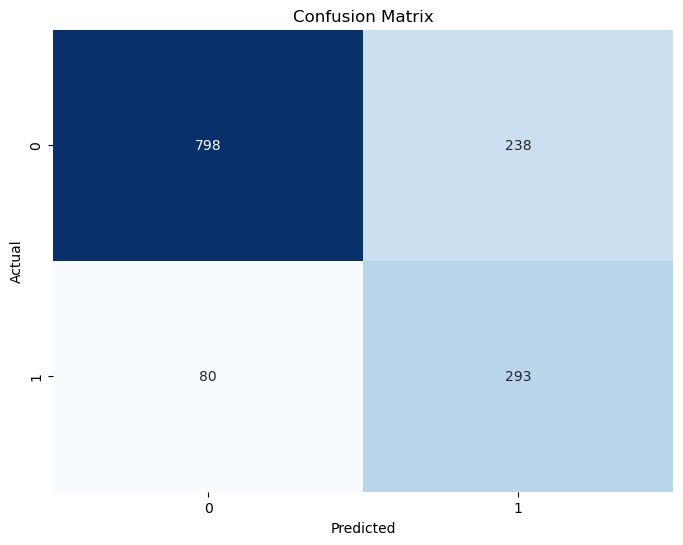

Best Random Forest Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Accuracy: 0.7856635911994322
Best Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1036
           1       0.59      0.62      0.60       373

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



<Figure size 640x480 with 0 Axes>

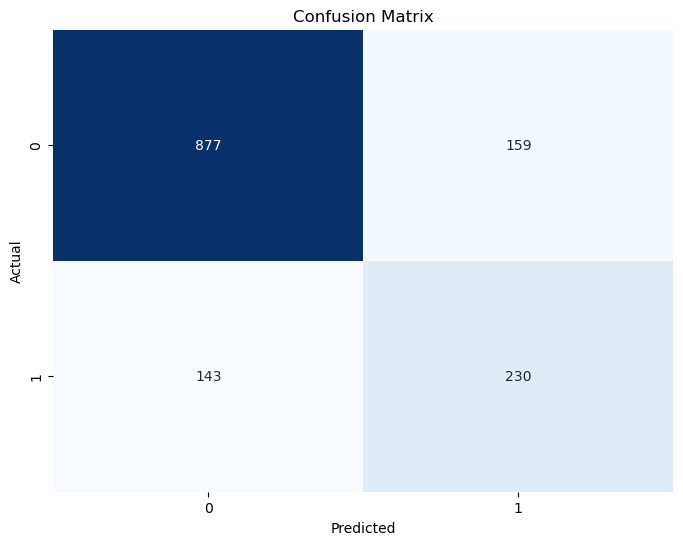

Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best XGBoost Accuracy: 0.7757274662881476
Best XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1036
           1       0.58      0.57      0.57       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.78      0.77      1409



<Figure size 640x480 with 0 Axes>

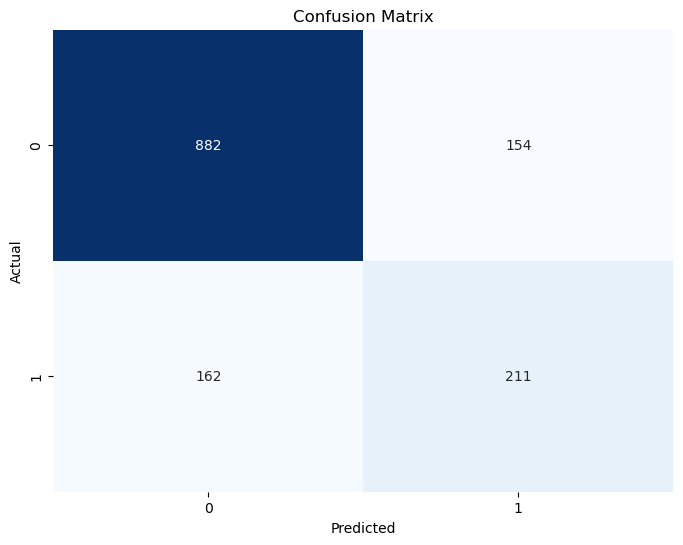

Best CatBoost Parameters: {'depth': 8, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.2}
Best CatBoost Accuracy: 0.7821149751596878
Best CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.59      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



<Figure size 640x480 with 0 Axes>

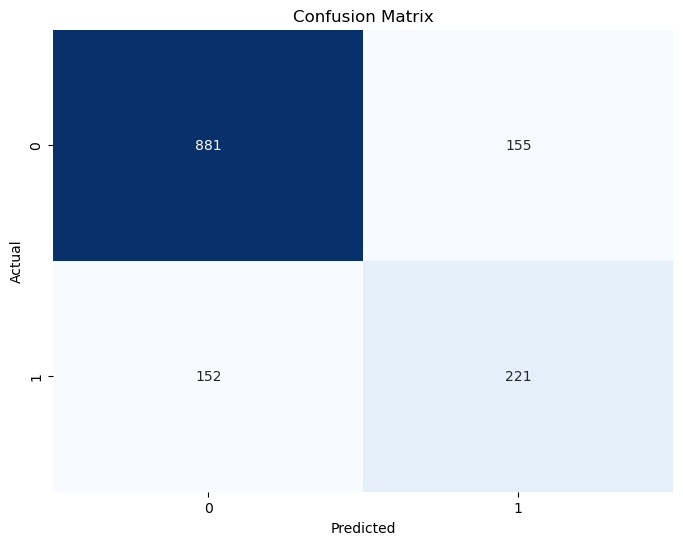

<Figure size 640x480 with 0 Axes>

In [31]:
# Hyperparameter Tuning for Logistic Regression , Random Forest, XGBoost, CatBoost

# Logistic Regression Hyperparameter Tuning
log_reg_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga']
}
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
log_reg_grid.fit(x_train_resampled, y_train_resampled)
log_reg_best = log_reg_grid.best_estimator_
log_reg_best_pred = log_reg_best.predict(x_test)
print("Best Logistic Regression Parameters:", log_reg_grid.best_params_)
print("Best Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_best_pred))
print("Best Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_best_pred))
confusion_matrix_log(y_test, log_reg_best_pred)

# Random Forest Hyperparameter Tuning   

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(random_forest, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(x_train_resampled, y_train_resampled)
rf_best = rf_grid.best_estimator_

rf_best_pred = rf_best.predict(x_test)
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest Accuracy:", accuracy_score(y_test, rf_best_pred))
print("Best Random Forest Classification Report:\n", classification_report(y_test, rf_best_pred))

confusion_matrix_log(y_test, rf_best_pred)

# XGBoost Hyperparameter Tuning
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(x_train_resampled, y_train_resampled)
xgb_best = xgb_grid.best_estimator_
xgb_best_pred = xgb_best.predict(x_test)
print("Best XGBoost Parameters:", xgb_grid.best_params_)
print("Best XGBoost Accuracy:", accuracy_score(y_test, xgb_best_pred))
print("Best XGBoost Classification Report:\n", classification_report(y_test, xgb_best_pred))
confusion_matrix_log(y_test, xgb_best_pred)

# CatBoost Hyperparameter Tuning
catboost_params = {
    'iterations': [100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [3, 5, 7]
}
catboost_grid = GridSearchCV(catboost, catboost_params, cv=5, scoring='accuracy', n_jobs=-1)
catboost_grid.fit(x_train_resampled, y_train_resampled)
catboost_best = catboost_grid.best_estimator_
catboost_best_pred = catboost_best.predict(x_test)
print("Best CatBoost Parameters:", catboost_grid.best_params_)
print("Best CatBoost Accuracy:", accuracy_score(y_test, catboost_best_pred))
print("Best CatBoost Classification Report:\n", classification_report(y_test, catboost_best_pred))
confusion_matrix_log(y_test, catboost_best_pred)


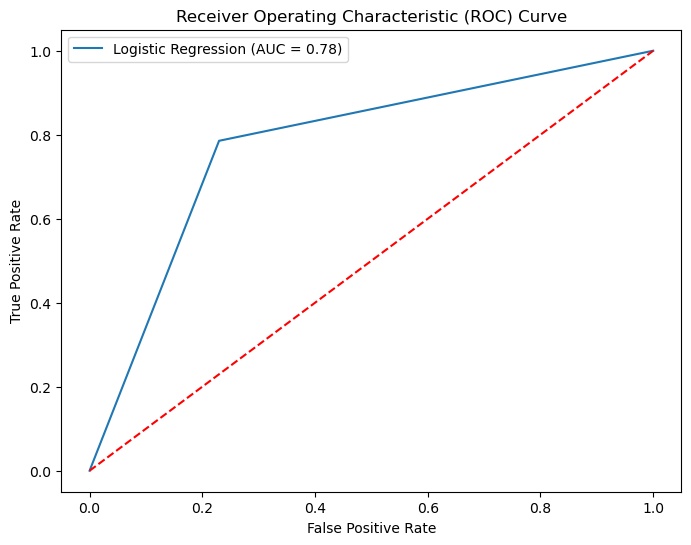

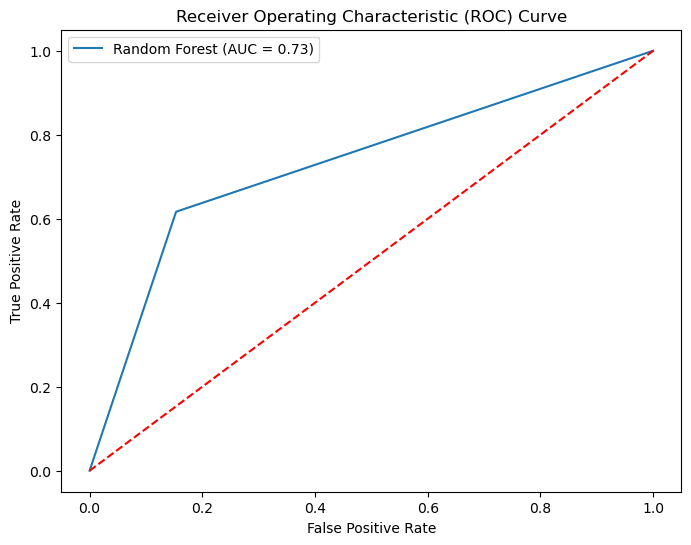

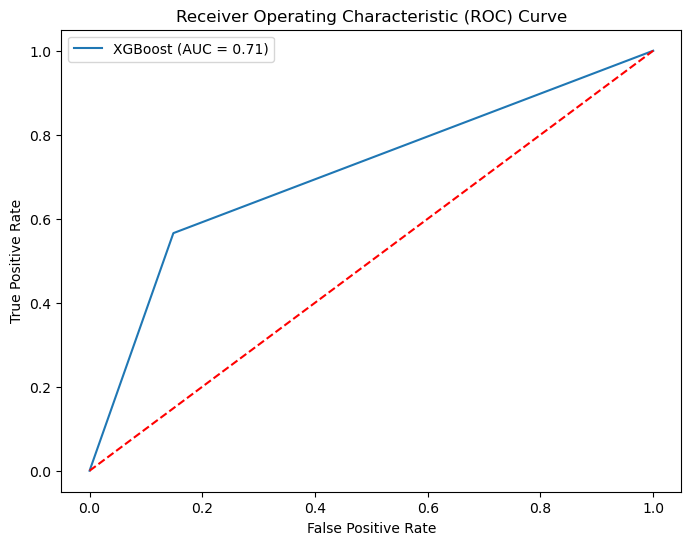

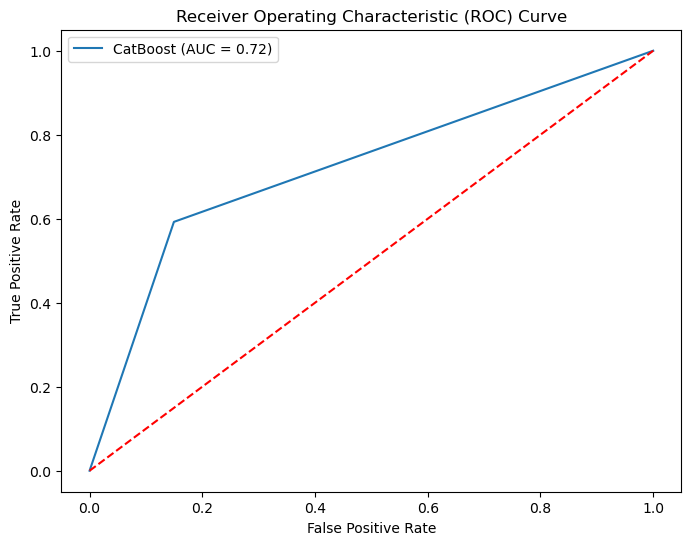

In [32]:
# ROC Curve and AUC

def plot_roc_curve(y_test, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

plot_roc_curve(y_test, log_reg_best_pred, 'Logistic Regression')
plot_roc_curve(y_test, rf_best_pred, 'Random Forest')
plot_roc_curve(y_test, xgb_best_pred, 'XGBoost')
plot_roc_curve(y_test, catboost_best_pred, 'CatBoost')



# **Saving and Loading the Model**

After training and evaluating our machine learning models, we need to save them for future use. This ensures that we don’t have to retrain the models every time we need predictions.

### **Saving the Model**
- We will use **joblib** or **pickle** to save the trained models.
- This allows us to reload the model later without retraining.

### **Loading the Model**
- We can load the saved model and use it for predictions on new data.

Saving and loading models is crucial for deployment, ensuring we can use our trained models efficiently in real-world applications.


In [33]:
# SAVING THE MODEL
import joblib
# Save the best model (CatBoost in this case)
joblib.dump(catboost_best, 'catboost_model.pkl')
# Save Logistic Regression model
joblib.dump(log_reg, "logistic_regression_model.pkl")



['logistic_regression_model.pkl']

In [34]:
# Load the model
log_reg_loaded = joblib.load("logistic_regression_model.pkl")
catboost_loaded = joblib.load("catboost_model.pkl")


# **Feature Importance Analysis**

Feature importance helps us understand which variables contribute most to customer churn. This step is crucial for model interpretability and business insights.

### **Why Feature Importance?**
- Identifies key drivers of churn.
- Helps in feature selection for better model performance.
- Provides actionable insights for business decision-making.

We will analyze feature importance for:
1. **Logistic Regression** (using coefficients)
2. **CatBoost** (using built-in feature importance)


# **Visualizing Feature Importance**

After calculating feature importance, we will visualize it using bar charts. This helps in better understanding which features influence churn predictions the most.

### **Visualization Techniques:**
- **Bar charts** to display feature importance scores.

These visualizations will help us make data-driven decisions and optimize our churn prediction model.


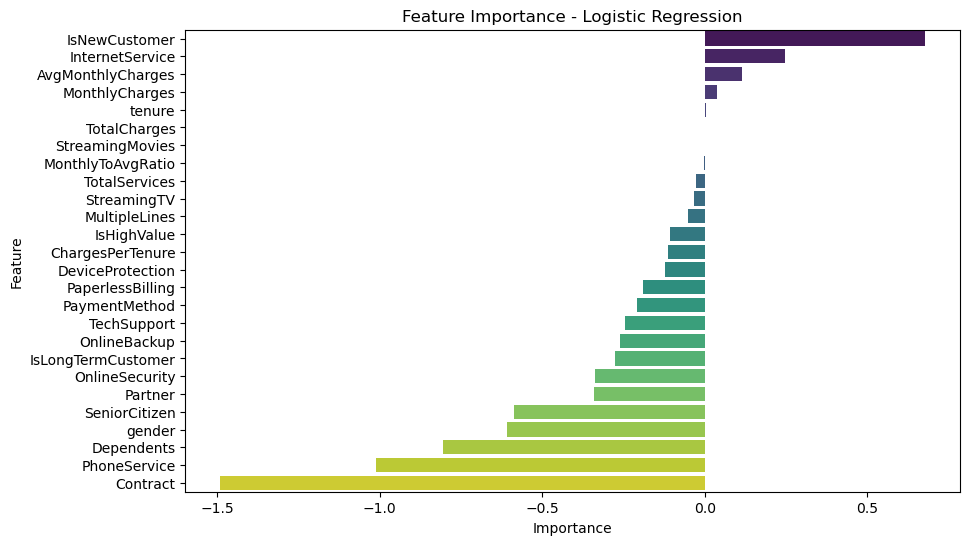

<Figure size 640x480 with 0 Axes>

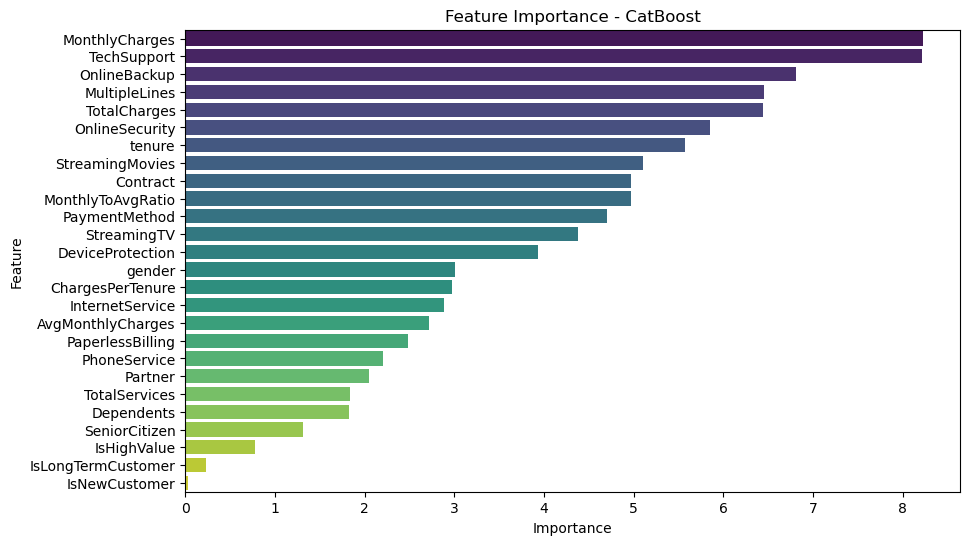

<Figure size 640x480 with 0 Axes>

In [ ]:
# Feature Importance
logistic_importance = log_reg_loaded.coef_[0]
catboost_importance = catboost_loaded.get_feature_importance()

# Create a DataFrame for feature importance
logistic_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': logistic_importance})
catboost_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': catboost_importance})

# Sort the DataFrame by importance
logistic_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
catboost_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importance for Logistic Regression
plt.figure(figsize=(10, 6))
plt.title('Feature Importance - Logistic Regression')
sns.barplot(x="Importance", y="Feature", data=logistic_importance_df, palette="viridis")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

plt.savefig('logistic_regression_feature_importance.png')

# Plot feature importance for CatBoost
plt.figure(figsize=(10, 6))
plt.title('Feature Importance - CatBoost')
sns.barplot(x="Importance", y="Feature", data=catboost_importance_df, palette="viridis")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
plt.savefig('catboost_feature_importance.png')